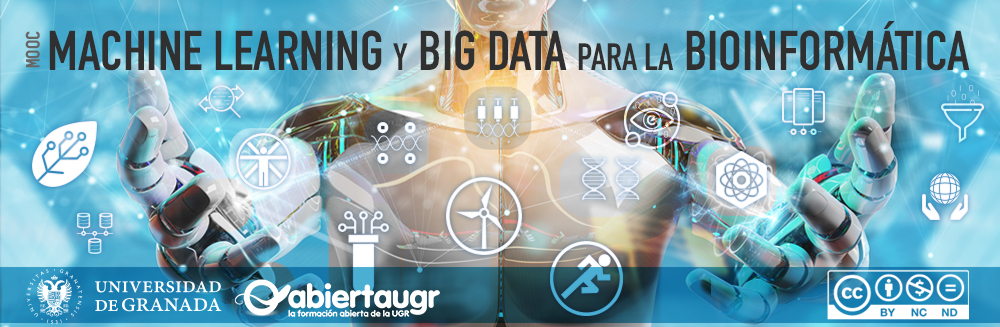
## **Módulo 7 - Big Data**
### **7.2 - Introducción a Spark usando Python**

**Autor**: 

*Por* **Fco. Javier García Castellano**.

*Profesor Titular de Universidad. Departamento de Ciencias de Computación e Inteligencia Artificial (DECSAI). Universidad de Granada.*

**Recordatorio: Introducción a NoteBook**

Dentro de este cuaderno (*NoteBook*), se le guiará paso a paso desde la carga de un conjunto de datos hasta el análisis descriptivo de su contenido.

El cuaderno de *Jupyter* (Python) es un enfoque que combina bloques de texto (como éste) junto con bloques o celdas de código. La gran ventaja de este tipo de celdas, es su interactividad, ya que pueden ser ejecutadas para comprobar los resultados directamente sobre las mismas. *Muy importante*: el orden las instrucciones es fundamental, por lo que cada celda de este cuaderno debe ser ejecutada secuencialmente. En caso de omitir alguna, puede que el programa lance un error, así que se deberá comenzar desde el principio en caso de duda.

Antes de nada:

Es muy muy importante que al comienzo se seleccione "*Abrir en modo de ensayo*" (draft mode), arriba a la izquierda. En caso contrario, no permitirá ejecutar ningún bloque de código, por cuestiones de seguridad. Cuando se ejecute el primero de los bloques, aparecerá el siguiente mensaje: "*Advertencia: Este cuaderno no lo ha creado Google.*". No se preocupe, deberá confiar en el contenido del cuaderno (*NoteBook*) y pulsar en "Ejecutar de todos modos".

¡Ánimo!

Haga clic en el botón "play" en la parte izquierda de cada celda de código. Las líneas que comienzan con un hashtag (#) son comentarios y no afectan a la ejecución del programa.

También puede pinchar sobre cada celda y hacer "*ctrl+enter*" (*cmd+enter* en Mac).

Cada vez que ejecute un bloque, verá la salida justo debajo del mismo. La información suele ser siempre la relativa a la última instrucción, junto con todos los `print()` (orden para imprimir) que haya en el código.

## **ÍNDICE**


En este *notebook*: 
1. Vamos a aprender a trabajar con Apache Spark mediante Python.
2. Veremos las opciones que tenemos para trabajar con los datos en Spark. 
3. Aprenderemos como cargar los datos desde un fichero y a trabajar con estos conjuntos de datos de Big Data.


Contenidos:
1. Spark con Python: PySpark.    
2. Tipos de datos en Spark: RDD, Dataset y DataFrame.   
3. Sesión en PySpark..
4. Lectura de datos de un fichero.
5. Trabajar con DataFrames.  
6. Aplicar consultas SQL sobre DataFrames.


##**1. SPARK CON PYTHON: PYSPARK.**

Se puede trabajar con Spark usando diferentes lenguajes, uno de ellos es Python. La forma estándar para trabajar con Apache Spark usando Python es PySpark. Podemos usar PySpark para ejecutar nuestros programas de Python que usen Spark, o podremos usar PySpark dentro de un cuaderno (*notebook*) como éste.

Para ejecutar Spark en un ordenador o varios, tenemos varias posibilidades, las más comunes son:
* Clúster de ordenadores local: Si se tiene acceso o la capacidad económica necesaria se puede ejecutar Spark en un [clúster de ordenadores](https://es.wikipedia.org/wiki/Cl%C3%BAster_de_computadoras). Esta opción no es recomendable para principiantes sino para un laboratorio que tiene esta necesidad. 
* Servidores en la nube: La mayoría de los proveedores de servicios de [computación en la nube](https://es.wikipedia.org/wiki/Computaci%C3%B3n_en_la_nube), ofrecen la posibilidad de usar Spark. Los ejemplos más conocidos son los servicios en la nube que ofrecen en Google Cloud Service,  Microsoft Azure, Amazon Elastic MapReduce (EMR) o [DataBricks](https://databricks.com/try-databricks) (que permite una cuenta muy básica gratuita). Es una buena opción que no requiere una gran inversión y que se puede ajustar a las necesidades de cada momento. 

También podremos usar Spark en nuestro ordenador personal, pero esto sólo nos servirá para aprender, o también, para el desarrollo y depuración de programas. Para problemas reales de Big Data, no podremos usar nuestro ordenador y si lo podemos usar, es por que probablemente no sea un problema de Big Data.

Los ejemplos que veremos en este curso, están en Google Colaboratory que no tiene grandes capacidades de computación, pero es lo suficiente para los ejemplos y ejercicios que vamos a ver. Se puede comprobar con el siguiente trozo de código.


In [ ]:
!cat /proc/cpuinfo | grep model\ name #Con esta línea vemos los procesadores que hay
!cat /proc/meminfo | grep MemTotal    #Con esta línea vemos el total de memoria RAM que hay


model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
MemTotal:       13333564 kB


###**1.1. Instalar Java, Apache Spark, PySpark y Findspark.**

Los programas de python que vamos a ver necesitarán tener instalado Java y Apache Spark. Java es necesario para poder ejecutar Spark. Si queremos trabajar en nuestro ordenador personal, habría que instalar Java y Spark. No obstante, para no tener que hacer ninguna instalación en nuestro ordenador, nosotros vamos a usar Google Colaboratory. De esta forma, con el siguiente código, le indicamos a Google Colaboratory que instale Apache Spark y Java. 

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq  #Instalamos Java

!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz #Nos descargamos Apache Spark con Hadoop
!tar xf spark-2.4.7-bin-hadoop2.7.tgz #Instalamos Apache Spark

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u282-b08-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u282-b08-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u282-b08-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u282-b08-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u282-b08-0ubuntu1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up ope

 Ahora instalamos [`PySpark`](https://spark.apache.org/docs/latest/api/python/index.html) que, como hemos dicho, nos permite usar Spark desde Python.
También vamos a tener que instalar [`Findspark`](https://github.com/minrk/findspark), que es
 una biblioteca de Python que nos ayuda a usar Spark en un cuaderno (*notebook*). 

In [ ]:
!pip install pyspark   #Instalamos Spark para Python
!pip install findspark #Instalamos FindSpark



     |████████████████████████████████| 212.3MB 72kB/s 
     |████████████████████████████████| 204kB 44.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=7b33a93930eb90616f6aba5e0324e840aa678469128e453818f35b632722b749
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


###**1.2. Primer programa en Spark**

Una vez que están todos los programas y bibliotecas están instaladas, lo siguiente que debemos hacer es darle valores a las variables de entorno, para indicar dónde están instalados Java y Spark. Estas variables de entorno, las podemos modificar cuando instalemos Spark y Java y, la forma de darles valores, depende de nuestro sistema operativo (Windows, Mac, Linux). No obstante, en los ejemplos, nosotros lo haremos desde Python. 

También hay que tener en cuenta que hay que especificar la ruta completa de dónde están instalados ambos programas.

In [ ]:
#Declaramos las variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

Ya sólo queda decirle a `findspark` la carpeta en la que está Spark, para enlazarlo con Python.

In [ ]:
#Indicamos donde está Spark
import findspark
findspark.init("spark-2.4.7-bin-hadoop2.7")#SPARK_HOME


Una vez que en nuestro entorno de trabajo tenemos todo instalado y configurado, ya podemos empezar a trabajar con Spark desde Python. En el inicio de todo programa en PySpark, tendremos que crear una sesión. 

In [ ]:
#Creamos una sesión de Spark para poder trabajar
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[2]").getOrCreate()

Ya está todo preparado para probar Spark. Para ello, vamos a crear un pequeño conjunto de nucleótidos con un DataFrame de Pandas. Lo convertiremos a un DataFrame de Spark para comprobar que todo funciona. Acto seguido lo mostraremos por pantalla.

In [ ]:
import random
import pandas as pd

#Creamos una cadena aleatoria de nucleótidos
listaNucleotidos=[{"ADN": random.choice("ATCG")} for x in range(1000)]

#Convertimos la cadena de nucleótidos en un DataFrame de Pandas
df = pd.DataFrame(listaNucleotidos)

#Convertimos el DataFrame de Pandas a Spark, y lo mostramos
ddf = spark.createDataFrame(df)
ddf.show(10)

+---+
|ADN|
+---+
|  C|
|  A|
|  A|
|  A|
|  T|
|  A|
|  G|
|  G|
|  G|
|  G|
+---+
only showing top 10 rows



##**2. TIPOS DE DATOS EN SPARK: RDD, DATASET y DATAFRAME.**


En Spark, hay tres tres tipos de datos para usar con Big Data: RDD, Dataset y DataFrame. Por tanto, en principio, hay tres formas distintas de trabajar en Spark, lo cual puede ser algo confuso. Veamos sus diferencias.

###**2.1. Resilient Distributed Dataset (RDD).**

Como vimos, es la abstracción de datos básica en Spark. Y es un conjunto de objetos repartido en los diversos nodos del clúster. Apareció en la versión 1.0 de Spark. Da igual qué tipo de datos usemos (*DataFrame* o *Dataset*) que al final, internamente, Spark siempre usa RDD.

Son un tipo de dato simple y permite trabajar con datos no estructurados, es decir, son más flexibles. Los datos no estructurados son aquellos que no tienen una estructura definida.

###**2.2. DataFrame.**

Los DataFrames son una modificación sobre los RDDs. Aparecieron en la versión 1.3 de Spark. Permiten definir un esquema sobre los datos. Esto significa que podemos ver los datos en forma de tabla, son estructurados, lo cual hace más sencillo trabajar con ellos. Otra característica importante es que al ser un dato estructurado, los procesos para trabajar con ellos están más optimizados, por lo que son más rápidos que los RDDs. 


###**2.3. Dataset.**

Los Dataset son una modificación sobre los DataFrame que aparecieron en la versión 1.6 de Spark. Podríamos decir que están pensados para que se detecten antes los errores de programación. No obstante, a la hora de trabajar con ellos, la forma es casi idéntica a hacerlo con DataFrames.

###**2.4. ¿Cuál Usar?.**

En este curso, vamos a trabajar con datos en forma de tabla (estructurados) que es lo habitual en Machine Learning. Por tanto, es mejor usar DataFrame al ser más sencillos de usar y más rápidos que los RDDs.

Por otro lado los Datasets no existen en Python por las características que tiene este lenguaje de prorgamación.

Por consiguiente, en este curso, usaremos DataFrames.

Los DataFrames de Sparks son muy similares a los DataFrame de Pandas, que se han visto en módulos anteriores de este curso. Aunque hay una diferencia notable, y es que los DataFrame de Spark pueden estar repartidos por varios ordenadores y los de Pandas sólo pueden estar en un solo ordenador. No obstante, se puede pasar de uno al otro sin mucho problema e incluso de forma eficiente con [Apache Arrow](https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html), siempre que los datos quepan en la memoria de sólo un ordenador. 


Veamos cómo:

In [ ]:
# Como antes, guardamos la cadena de nucleótidos en un DataFrame de Pandas
pdf = pd.DataFrame(listaNucleotidos)

# Convertimos el DataFrame de Pandas a Spark
sdf = spark.createDataFrame(pdf)

# Convertimos el DataFrame de Spark DataFrame a uno de Pandas y lo mostramos
psdf = sdf.select("*").toPandas()
psdf.head()


,ADN
0,C
1,A
2,A
3,A
4,T


##**3. SESIÓN EN PYSPARK.**


La puerta de entrada a toda la funcionalidad de Spark es la clase `SparkSession`. Para crear una sesión en Spark, usamos `SparkSession.builder`. En informática, una sesión es un intercambio de información interactiva semipermanente entre dos o más entidades, en nuestro caso entre Spark y Python.  Los atributos más comunes usados con [`SparkSession.builder`](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.SparkSession.Builder) son:

*   `appName(nombre)` − Para darle un nombre a la aplicación.

*   `config(clave, valor)` − Para darle un valor a una propiedad de la configuración. Todas las opciones de configuración las podemos ver en la [documentación de la configuración en Spark](http://spark.apache.org/docs/latest/configuration.html).

*   `master(valor)` − Para indicar la dirección en Internet (URL) del nodo maestro del clúster de ordenadores. Para ejecutarlo en nuestro ordenador personal se hace con `local` para ejecutarlo de forma local con una sola hebra de ejecución. Con `local[n]` se ejecuta localmente con `n` hebras. Si usamos `local[*]` ejecuta Spark en nuestro ordenador personal con tantas hebras como permita nuestra máquina.

*   `getOrCreate()` - Este método obtiene una sesión de Spark existente o, si no hay ninguna, la crea.

La sesión de Spark, es la vía de acceso de Python a Spark, desde la versión 2.0 de Apache Spark. Anteriormente se utilizaban diferentes contextos del tipo `SparkContext` para acceder a las diferentes funcionalidades.

In [ ]:
#Creamos una sesión de Spark para poder trabajar
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Ejemplo básico PySpark") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


##**4. LECTURA DE DATOS DE UN FICHERO.**

Vamos a aprender cómo cargar un fichero en un DataFrame de Spark. Para ello vamos a trabajar con el problema de visto en el Módulo 5, Cápsula 2. Es un problema de aprendizaje supervisado, para la predicción del melanoma cutáneo. 

Antes que nada, vamos a cargar los datos en Googgle Colaboratory.




In [ ]:
#Nos descargamos los ficheros de datos en Google Colaboratory 
!wget -nv -c --no-check-certificate 'https://docs.google.com/uc?export=download&id=1J3jo-YRKGX1lBjA0-B8U1ZJibHYEAbmL' -O inmune_X.csv
!wget -nv -c --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hHQfcvrFa5Jds-9tW_X4sHjKpYKdii9s' -O inmune_Y.csv 
#Vamos a mostrar la cabecera de los ficheros y dos filas, para comprobar
#que se han bajado correctamente.
!head -3 inmune_X.csv
!head -3 inmune_Y.csv

2021-04-10 16:18:40 URL:https://doc-0g-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/90d1fa3k6jlnh3ns62g81jnbdltoee9a/1618071450000/05131985187150583765/*/1J3jo-YRKGX1lBjA0-B8U1ZJibHYEAbmL?e=download [9152821] -> "inmune_X.csv" [1]
2021-04-10 16:18:40 URL:https://doc-0c-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i64hqeqsa8bslnp5oiih7qq55vh4hpfj/1618071450000/05131985187150583765/*/1hHQfcvrFa5Jds-9tW_X4sHjKpYKdii9s?e=download [3949/3949] -> "inmune_Y.csv" [1]
,TYRP1,RPS4Y1,KRT6A,XIST,KRT14,KRT16,KRT5,XAGE1B,KRT6B,PAEP,KRT6C,MAGEC2,DDX3Y,KRT1,KDM5D,MAGEA4,KRT17,MAGEC1,OCA2,NELL1,PMEL,PAGE5,CTAG2,MAGEA6,MAGEA2B,EDN3,S100A7,MAGEA3,HHATL,MAGEA12,CTAG1A,SPRR1B,TRPM1,EIF1AY,CALML3,SFN,VGF,DCT,ABCB5,EYA1,IL13RA2,MAGEA1,GAGE12J,CSAG1,USP9Y,CALML5,LRP2,FDCSP,SFRP1,TRIM29,MLANA,UTY,GJB6,CCL21,MAPK4,CHST9,TF,COL11A1,PRKG2,SBSN,KRTDAP,SOSTDC1,CNDP1,COL9A1,COL22A1,FABP7,PKP1,FAM178B,MAGEA10,PI3,ABCA8,ALDH3B2,MAGEB2,CDH1,CR2,RP11-986E7.

Una vez que lo tenemos en disco vamos a usar un [DataFrameReader](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader) para leer ambos ficheros. 

Si nos fijamos, para leer el primer fichero, se usan métodos con distintas opciones, por ejemplo, con `load()` indicamos le nombre del fichero. Con `format()` se indica que es un fichero CSV. Con `option()` le indicamos que obtenga el esquema de los datos (`inferSchema`) y que el fichero tiene una primera fila de cabecera con el nombre  las columnas (`header`). Se pueden indicar muchas más opciones, como la codificación, los separadores, comentarios, etc.

También podemos abrir distintos tipos de formatos de ficheros (`json, parquet, orc, libsvm, csv, text`) en local, o desde una base de datos (usando `JDBC`) o usando HDFS. 

En la lectura del segundo fichero, hemos usar directamente el método `csv()` para leerlo. Al final de leerlos mostramos las 3 primeras líneas con el método `show()`.




In [ ]:
#Leemos las variables de entrada
dfX = spark.read \
    .format("csv") \
    .option("inferSchema",True) \
    .option("header", True) \
    .load("inmune_X.csv")
dfX.show(3)

#Leemos la variable de salida
dfY = spark.read.csv('inmune_Y.csv',
                     inferSchema=True, 
                     header=True)
dfY.show(3)





+---+-------------------+-----------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+------------------+------------------+-------------------+-----------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+-----------------+-----------------+--------------------+-------------------+-------------------+-----------------+------------------+------------------+--------------------+-----------------+-------------------+------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+-------------------+------------------+-----------------+-----------------+------+-----------------+------------------+-------------------+-------------------+-------------------+------------

##**5. TRABAJAR CON DATAFRAMES.**

Ya que tenemos nuestros datos en Spark, vamos a aprender a trabajar con ellos. 


###**5.1. Navegando por los DataFrames.**

Para ver el número de filas que tenemos, podemos usar el método `.count()` y para ver el número de columnas (variables) podemos usar la propiedad `.columns` y ver su tamaño. Para ver nombre y el tipo de dato de cada columna, esto es, el esquema, podemos usar el método `.printSchema()`. 

Para mostrar el DataFrame podemos usar el método `.show()` como hemos hecho anteriormente. También lo podemos usar en combinación del método `.describe()` que nos calcula un resumen estadístico del DataFrame. 



In [ ]:
#Mostramos el tamaño del fichero de las variables de entrada
print ("Tenemos", len(dfX.columns)-1, "variables de entrada y" ,
       dfX.count(), "instancias.")

#Mostramos el esquema y un resumen estadístico del fichero de la variable de salida
print ("\nEsquema de dfY:")
dfY.printSchema()
print ("\nResumen estadístico dedfY:")
dfY.describe().show()


Tenemos 1491 variables de entrada y 336 instancias.

Esquema de dfY:
root
 |-- _c0: integer (nullable = true)
 |-- RNASEQ-CLUSTER_CONSENHIER: string (nullable = true)


Resumen estadístico dedfY:
+-------+-----------------+-------------------------+
|summary|              _c0|RNASEQ-CLUSTER_CONSENHIER|
+-------+-----------------+-------------------------+
|  count|              336|                      336|
|   mean|            167.5|                     null|
| stddev|97.13907555664713|                     null|
|    min|                0|                 MITF-low|
|    max|              335|                   immune|
+-------+-----------------+-------------------------+




Para trabajar con los Dataframes podemos quedarnos con una o varias columnas usando el método `select()`. Para identificar a las columnas podemos usar una cadena con el nombre de la columna, o usando el nombre de la columna como una propiedad del DataFrame, usando el DataFrame como un diccionario e indicando como clave el nombre de la columna, o bien, usando el DataFrame e indicando el número de columna, teniendo en cuenta que empezamos a contar desde cero.

In [ ]:
#Veamos distintas formas de quedarnos con las variables de entrada segunda, 
#cuarta y sexta.
dfX.select('TYRP1','KRT6A','KRT14').show(5)
dfX.select(dfX.TYRP1,dfX.KRT6A,dfX.KRT14).show(5)
dfX.select(dfX['TYRP1'],dfX['KRT6A'],dfX['KRT14']).show(5)
dfX.select(dfX[1],dfX[3],dfX[5]).show(5)


+-------------------+-------------------+-------------------+
|              TYRP1|              KRT6A|              KRT14|
+-------------------+-------------------+-------------------+
| 2.7504627735116602|0.42007312693424703|-2.8987916629252592|
| -5.566030015996501| 0.0260954433791682| -0.531967458719549|
|-4.9072628904726505| 0.8504174516070371|  0.375261221152995|
|   5.54681507588922|  -2.37481458991564|-0.7988656239782429|
| 7.0367948190278495| 3.0978539408002996| 1.4826106729146697|
+-------------------+-------------------+-------------------+
only showing top 5 rows

+-------------------+-------------------+-------------------+
|              TYRP1|              KRT6A|              KRT14|
+-------------------+-------------------+-------------------+
| 2.7504627735116602|0.42007312693424703|-2.8987916629252592|
| -5.566030015996501| 0.0260954433791682| -0.531967458719549|
|-4.9072628904726505| 0.8504174516070371|  0.375261221152995|
|   5.54681507588922|  -2.37481458991564|-0.7


También podemos filtrar los datos que queremos mostrar con el método `filter()`, agrupar valores comunes con el método `groupby()`, u ordenar los datos con el método `sort()`.

In [ ]:
#Nos quedamos con aquellas filas donde el valor del atributo TYRP1 es positivo.
dfX.filter(dfX.TYRP1>0).show(5)

#Agrupamos los distintos valores de la variable de salida.
dfY.groupby(dfY[1]).count().show(5)

#Ordenamos los valores del atributo TYRP1.
dfX.select(dfX[0], 'TYRP1').sort('TYRP1').show(5)


+---+------------------+------------------+-------------------+-----------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+--------------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+------------------+--------------------+------------------+-------------------+-------------------+-------------------+------------------+-----------------+----------------+-------------------+-------------------+-------------------+------------------+-------------------+

###**5.2 Modificando los DataFrames.**

Con el método `withColumn()` se puede cambiar el tipo de una columna, cambiar sus valores  y también puede utilizarse para crear una nueva columna. Para cambiar el nombre de una columna lo haremos con el método  `withColumnRenamed()`.

Para eliminar una o varias columnas podemos usar el método `drop()` y con `dropDuplicates()` podemos eliminar aquellas filas que sean iguales, dejando sólo una de ellas.

Con el método `join()` podremos unir tablas.

In [ ]:
#Vamos cambiar la primera columna de dfY de Integer a Double
dfY.withColumn("_c0",dfY._c0.cast("Double")).show(5)

#Vamos a multiplicar por dos los valores de la primera columna de dfY 
dfY.withColumn("_c0",dfY._c0*2).show(5)

#Vamos a añadir una columna con los valores de la primera columa de dfY por 3 
dfY.withColumn("tres",dfY._c0*3).show(5)

#Vamos a cambiar el nombre de la variable clase
dfY=dfY.withColumnRenamed("RNASEQ-CLUSTER_CONSENHIER","clase")
dfY.show(5)

#Voy a eliminar la primera columna de dfY
dfY.drop('_c0').show(5)

#Voy a eliminar la primera columna de dfY y luego eliminar filas repetidas
dfY.drop('_c0').dropDuplicates().show(5)

#Voy a añadir la clase a la tabla de atributos
dfX.join(dfY, dfX._c0 == dfY._c0).show(5)




+---+-------------------------+
|_c0|RNASEQ-CLUSTER_CONSENHIER|
+---+-------------------------+
|0.0|                   immune|
|1.0|                 MITF-low|
|2.0|                 MITF-low|
|3.0|                   immune|
|4.0|                   immune|
+---+-------------------------+
only showing top 5 rows

+---+-------------------------+
|_c0|RNASEQ-CLUSTER_CONSENHIER|
+---+-------------------------+
|  0|                   immune|
|  2|                 MITF-low|
|  4|                 MITF-low|
|  6|                   immune|
|  8|                   immune|
+---+-------------------------+
only showing top 5 rows

+---+-------------------------+----+
|_c0|RNASEQ-CLUSTER_CONSENHIER|tres|
+---+-------------------------+----+
|  0|                   immune|   0|
|  1|                 MITF-low|   3|
|  2|                 MITF-low|   6|
|  3|                   immune|   9|
|  4|                   immune|  12|
+---+-------------------------+----+
only showing top 5 rows

+---+--------+
|

##**6. APLICAR CONSULTAS SQL SOBRE DATAFRAMES.**

De forma análoga a como hemos trabajado con los DataFrames en el apartado anterior podemos hacerlo usando consultas SQL. Puesto que este curso es introductorio, no se presuponen conocimientos de SQL, pero si el alumno tiene conocimientos de SQL, usar SQL puede ser la mejor opción.

Para poder trabajar con los DataFrames como tablas tendremos que definir vistas con el método `createOrReplaceTempView()`. Una vez que hayamos definido una vista y usando el método `sql()` de la sesión, podremos trabajar cómodamente usando SQL. 

In [ ]:

# register the DataFrame as a SQL temporary view so that we can query it using SQL
dfX.createOrReplaceTempView("tablaAtributos")
dfY.createOrReplaceTempView("tablaClase")

#Mostramos las tablas que hay
spark.sql("SHOW TABLES").show()

#Equivalente a dfX.select('TYRP1','KRT6A','KRT14').show(5)
sqlDF = spark.sql("SELECT TYRP1,KRT6A,KRT14 FROM tablaAtributos")
sqlDF.show(5)

#Equivalente a dfY.groupby(dfY[1]).count().show(5)
spark.sql("SELECT clase, count(clase) FROM tablaClase GROUP BY clase").show(5)

#Equivalente dfX.select(dfX[0], 'TYRP1').sort('TYRP1').show(5)
spark.sql("SELECT _c0,TYRP1 FROM tablaAtributos ORDER BY TYRP1").show(5)

#Equivalente a dfX.join(dfY, dfX._c0 == dfY._c0).show(5)
spark.sql("SELECT * FROM tablaAtributos,tablaClase WHERE tablaAtributos._c0 == tablaClase._c0").show(5)



+--------+--------------+-----------+
|database|     tableName|isTemporary|
+--------+--------------+-----------+
|        |tablaatributos|       true|
|        |    tablaclase|       true|
+--------+--------------+-----------+

+-------------------+-------------------+-------------------+
|              TYRP1|              KRT6A|              KRT14|
+-------------------+-------------------+-------------------+
| 2.7504627735116602|0.42007312693424703|-2.8987916629252592|
| -5.566030015996501| 0.0260954433791682| -0.531967458719549|
|-4.9072628904726505| 0.8504174516070371|  0.375261221152995|
|   5.54681507588922|  -2.37481458991564|-0.7988656239782429|
| 7.0367948190278495| 3.0978539408002996| 1.4826106729146697|
+-------------------+-------------------+-------------------+
only showing top 5 rows

+--------+------------+
|   clase|count(clase)|
+--------+------------+
|MITF-low|         168|
|  immune|         168|
+--------+------------+

+---+----------------+
|_c0|           TYRP

## **REFERENCIAS BIBLIOGRÁFICAS**

*  Karlijn Willems. "Apache Spark in Python: Beginner's Guide". (2017). [Acceso 7 de junio de 2020]. Disponible en: https://www.datacamp.com/community/tutorials/apache-spark-python 

*  Achilleus. "A tale of Spark Session and Spark Context". (2019). [Acceso 7 de junio de 2020]. Disponible en: https://medium.com/@achilleus/spark-session-10d0d66d1d24 

*  Chandan Prakash. "Apache Spark : RDD vs DataFrame vs Dataset". (2016). [Acceso 7 de junio de 2020]. Disponible en: https://www.linkedin.com/pulse/apache-spark-rdd-vs-dataframe-dataset-chandan-prakash 


*  Databricks. "Introduction to DataFrames - Python". (2020). [Acceso 7 de junio de 2020]. Disponible en: https://docs.databricks.com/spark/latest/dataframes-datasets/introduction-to-dataframes-python.html#


*   The Apache Software Foundation. "Spark SQL, DataFrames and Datasets Guide". (2020). [Acceso 7 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/sql-programming-guide.html#spark-sql-guide



###**Referencias Adicionales**

*  The Apache Software Foundation." Welcome to Spark Python API Docs!". (2020). [Acceso 7 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/api/python/index.html 

*  Evan Heitman. "A Neanderthal’s Guide to Apache Spark in Python". (2019). [Acceso 7 de junio de 2020]. Disponible en: https://towardsdatascience.com/a-neanderthals-guide-to-apache-spark-in-python-9ef1f156d427

*   Akbani, R., Akdemir, K. C., Aksoy, B. A., Albert, M., Ally, A., Amin, S. B., et. al. (2015). Genomic classification of cutaneous melanoma. Cell, 161(7), 1681-1696.

*   Jules Damji. "A Tale of Three Apache Spark APIs: RDDs vs DataFrames and Datasets". (2016). [Acceso 8 de junio de 2020]. Disponible en:  https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html
  
*   Geeky Theory. "Apache Spark: qué es y cómo funciona". (2015). [Acceso 8 de junio de 2020]. Disponible en: https://geekytheory.com/apache-spark-que-es-y-como-funciona




<div class="alert alert-block alert-success">

MOOC Machine Learning y Big Data para la Bioinformática (1ª edición)   
http://abierta.ugr.es     
    
![CC](https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-nd.png)
</div>    